In [2]:
import re

def main(file):

    # Parse the chemical file and extract unique species and reactions
    # The file should be in the same directory as this script
    uniqueSpecies, reactions = parseChemFile(file)

    # Print the unique species and reactions
    print('Unique Species:')
    for species in uniqueSpecies:
        print(species)
    print('\nReactions:')
    for reaction in reactions:
        print(f"R{reactions.index(reaction)+1}: {reaction['description']}")

    # Print details of a particular reaction as an example
    print('\nDetails of Reaction 1:')
    reaction = reactions[0]
    reactionDescription = reaction['description']
    lhsSpecies = reaction['lhsSpecies']
    lhsStoichiometricCoeffs = reaction['lhsStoichiometricCoeffs']
    rhsSpecies = reaction['rhsSpecies']
    rhsStoichiometricCoeffs = reaction['rhsStoichiometricCoeffs']
    backwardReaction = reaction['backwardReaction']
    print(f"Description: {reactionDescription}")
    for idx in range(len(lhsSpecies)):
        print(f"Reactant (Left Hand Side): {lhsStoichiometricCoeffs[idx]} {lhsSpecies[idx]}")
    for idx in range(len(rhsSpecies)):
        print(f"Product (Right Hand Side): {rhsStoichiometricCoeffs[idx]} {rhsSpecies[idx]}")
    print(f"Backward Reaction: {backwardReaction}")
    
    # Return 0 if the script runs successfully
    return 0

def parseChemFile(file):
    """
    Parse a chemical file and extract relevant information.
    """
    # Read the file and remove commented and empty lines
    with open(file, 'r') as f:
        lines = f.readlines()

    # Analyze every line and extract relevant information
    uniqueSpecies = []
    reactions = []
    for line in lines:
        cleanLine = line.strip()
        # Skip empty lines and comment lines
        if not cleanLine or cleanLine.startswith('%'):
            continue
        # Parse reaction information
        reaction = parseReactionStr(cleanLine.split('|')[0].strip())
        if reaction not in reactions:
            reactions.append(reaction)
        # Extract species present in the reaction and add to the list
        for species in reaction['lhsSpecies']:
            if species not in uniqueSpecies:
                uniqueSpecies.append(species)
        for species in reaction['rhsSpecies']:
            if species not in uniqueSpecies:
                uniqueSpecies.append(species)

    # Return the list of unique species and reactions
    return uniqueSpecies, reactions

def parseReactionStr(reactionStr):
    """
    Parse a reaction string and extract relevant information.
    """
    # Split the reaction string into reactants and products
    if '<->' in reactionStr:
        backwardReaction = True
        lhsStr, rhsStr = reactionStr.split('<->')
    elif '->' in reactionStr:
        backwardReaction = False
        lhsStr, rhsStr = reactionStr.split('->')
    else:
        raise ValueError("Invalid reaction string format")
    
    # Extract species from the left-hand side (reactants)
    lhsSpecies, lhsStoichiometricCoeffs = parseSpeciesStr(lhsStr)
    
    # Extract species from the right-hand side (products)
    rhsSpecies, rhsStoichiometricCoeffs = parseSpeciesStr(rhsStr)
    
    # Create reaction dictionary
    # Para reacciÃ³n reversible, se concatenan las listas de ambos lados
 
    reaction = {
            'description': reactionStr,
            'lhsSpecies': lhsSpecies,
            'lhsStoichiometricCoeffs': lhsStoichiometricCoeffs,
            'rhsSpecies': rhsSpecies,
            'rhsStoichiometricCoeffs': rhsStoichiometricCoeffs,
            'backwardReaction': backwardReaction
        }
    return reaction

def parseSpeciesStr(str):
    """
    Parse a species string and extract relevant information.
    """
    # Define regular expression to extract species and their stoichiometric coefficients
    speciesPattern = r'(?:^|\s|[+])(\d*)\s*([eE]|[A-Za-z][A-Za-z0-9]*\([^)]*\))(?=\s|[+]|$)'

    # Extract species from the left-hand side (reactants)
    matches = re.findall(speciesPattern, str)
    speciesList = []
    stoichiometricCoeffList = []
    for match in matches:
        coeff = int(match[0]) if match[0] else 1  # Default coefficient is 1
        species = match[1].strip()
        if species not in speciesList:
            speciesList.append(species) 
            stoichiometricCoeffList.append(coeff)
        else:
            index = speciesList.index(species)
            stoichiometricCoeffList[index] += coeff

    return speciesList, stoichiometricCoeffList

if __name__ == "__main__":
    main('helium.chem')



Unique Species:
e
He(1S1)
He(2S3)
He(2S1)
He(2P3)
He(2P1)
He(3S3)
He(3S1)
He(3P3)
He(3D3)
He(3D1)
He(3P1)
He(4S3)
He(4S1)
He(4P3)
He(4D3)
He(4D1)
He(4F3)
He(4F1)
He(4P1)
He(5S3)
He(5S1)
He(5P3)
He(5D3)
He(5D1)
He(5FG3)
He(5FG1)
He(5P1)
He(6S3)
He(6S1)
He(6P3)
He(6D3)
He(6D1)
He(6FGH3)
He(6FGH1)
He(6P1)
He(7S3)
He(7S1)
He(7P3)
He(7D3)
He(7D1)
He(7FGHI3)
He(7FGHI1)
He(7P1)
He(+,1S2)
He2(exc)
He2(+,2S3)

Reactions:
R1: e + He(1S1) <-> e + He(2S3)
R2: e + He(1S1) <-> e + He(2S1)
R3: e + He(1S1) <-> e + He(2P3)
R4: e + He(1S1) <-> e + He(2P1)
R5: e + He(1S1) <-> e + He(3S3)
R6: e + He(1S1) <-> e + He(3S1)
R7: e + He(1S1) <-> e + He(3P3)
R8: e + He(1S1) <-> e + He(3D3)
R9: e + He(1S1) <-> e + He(3D1)
R10: e + He(1S1) <-> e + He(3P1)
R11: e + He(1S1) <-> e + He(4S3)
R12: e + He(1S1) <-> e + He(4S1)
R13: e + He(1S1) <-> e + He(4P3)
R14: e + He(1S1) <-> e + He(4D3)
R15: e + He(1S1) <-> e + He(4D1)
R16: e + He(1S1) <-> e + He(4F3)
R17: e + He(1S1) <-> e + He(4F1)
R18: e + He(1S1) <-> e + He(4P1)

Orden de nodos (filas/columnas): ['e', 'He(1S1)', 'He(2S3)', 'He(2S1)', 'He(2P3)', 'He(2P1)', 'He(3S3)', 'He(3S1)', 'He(3P3)', 'He(3D3)', 'He(3D1)', 'He(3P1)', 'He(4S3)', 'He(4S1)', 'He(4P3)', 'He(4D3)', 'He(4D1)', 'He(4F3)', 'He(4F1)', 'He(4P1)', 'He(5S3)', 'He(5S1)', 'He(5P3)', 'He(5D3)', 'He(5D1)', 'He(5FG3)', 'He(5FG1)', 'He(5P1)', 'He(6S3)', 'He(6S1)', 'He(6P3)', 'He(6D3)', 'He(6D1)', 'He(6FGH3)', 'He(6FGH1)', 'He(6P1)', 'He(7S3)', 'He(7S1)', 'He(7P3)', 'He(7D3)', 'He(7D1)', 'He(7FGHI3)', 'He(7FGHI1)', 'He(7P1)', 'He(+,1S2)', 'He2(exc)', 'He2(+,2S3)']

--- Matriz de Adyacencia (Formato NumPy) ---
[[664.  48.  45. ...  43.   1.   1.]
 [ 81. 113.   1. ...   2.   2.  39.]
 [ 51.   7.   0. ...   5.   1.   4.]
 ...
 [  1.   2.   1. ...   0.   0.   1.]
 [  2.   3.   0. ...   0.   0.   1.]
 [  2.   7.   2. ...   1.   1.   0.]]




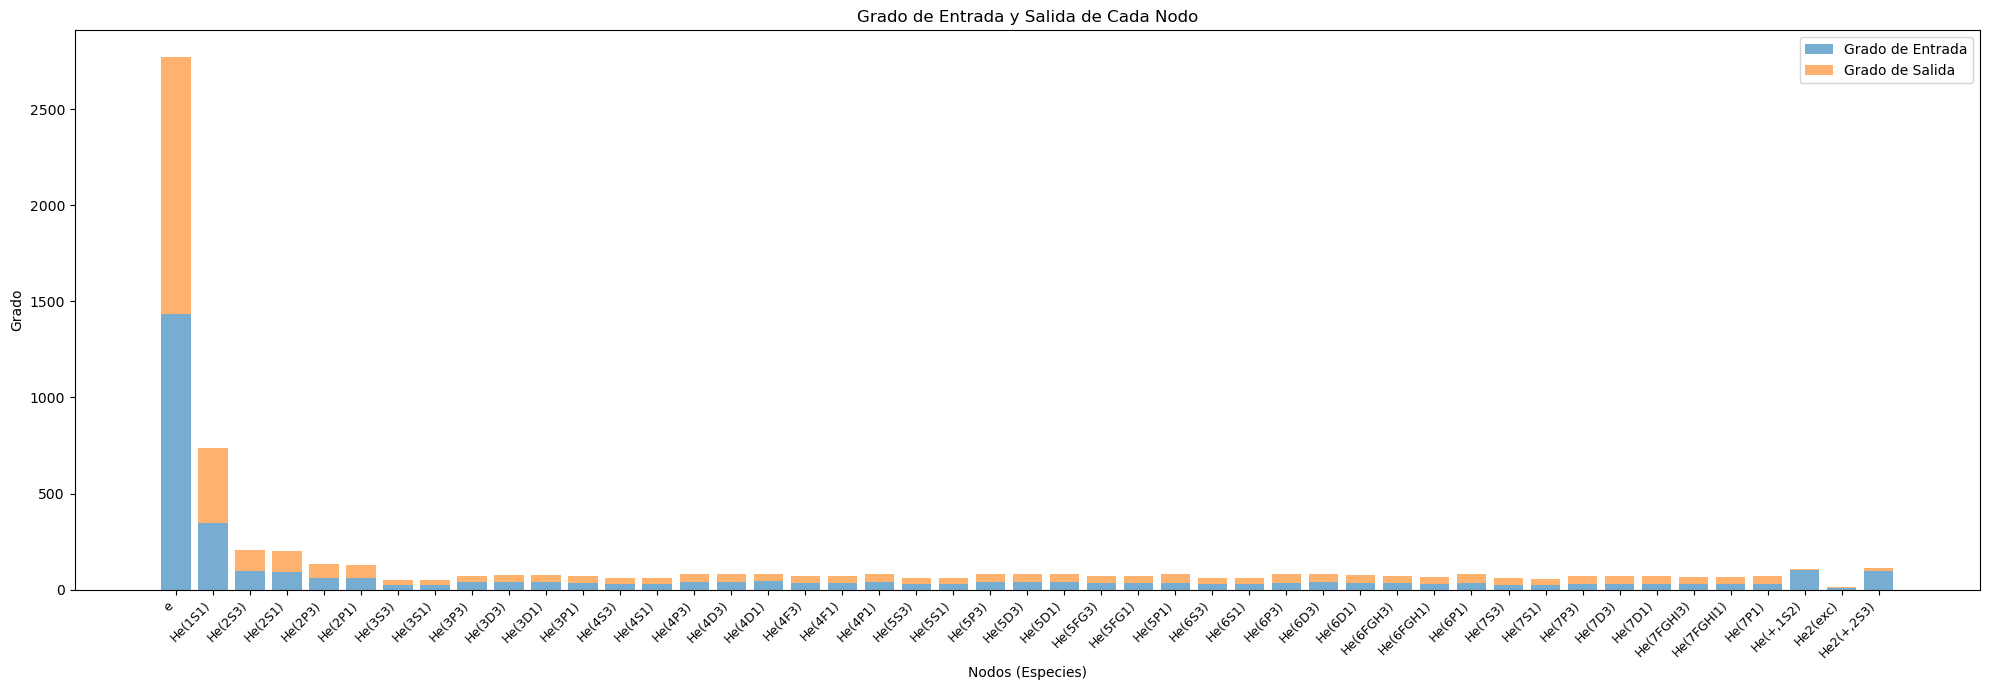

[1436.0, 349.0, 96.0, 92.0, 60.0, 58.0, 25.0, 25.0, 37.0, 38.0, 39.0, 36.0, 30.0, 30.0, 39.0, 41.0, 42.0, 36.0, 36.0, 38.0, 29.0, 29.0, 37.0, 39.0, 40.0, 34.0, 34.0, 36.0, 28.0, 28.0, 35.0, 37.0, 36.0, 32.0, 30.0, 34.0, 24.0, 24.0, 28.0, 30.0, 30.0, 28.0, 28.0, 28.0, 104.0, 6.0, 96.0]


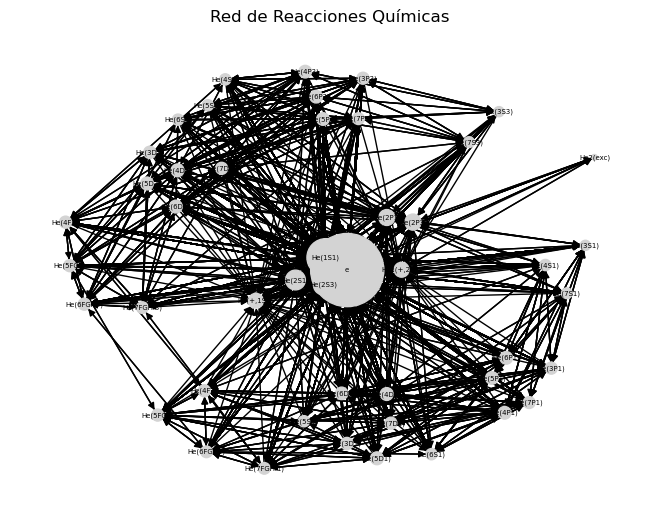

--- Centralidad de los Nodos ---
Nodo: e, Centralidad: 0.1153
Nodo: He(1S1), Centralidad: 0.1153
Nodo: He(2S3), Centralidad: 0.1072
Nodo: He(2S1), Centralidad: 0.0963
Nodo: He(2P3), Centralidad: 0.0297
Nodo: He(2P1), Centralidad: 0.0241
Nodo: He2(+,2S3), Centralidad: 0.0067
Nodo: He(6D1), Centralidad: 0.0049
Nodo: He(4D3), Centralidad: 0.0040
Nodo: He(4D1), Centralidad: 0.0040
Nodo: He(5D3), Centralidad: 0.0040
Nodo: He(5D1), Centralidad: 0.0040
Nodo: He(6D3), Centralidad: 0.0040
Nodo: He(7D3), Centralidad: 0.0040
Nodo: He(7D1), Centralidad: 0.0040
Nodo: He(6P3), Centralidad: 0.0039
Nodo: He(6P1), Centralidad: 0.0039
Nodo: He(7P3), Centralidad: 0.0039
Nodo: He(7P1), Centralidad: 0.0039
Nodo: He(4P3), Centralidad: 0.0039
Nodo: He(4P1), Centralidad: 0.0039
Nodo: He(5P3), Centralidad: 0.0039
Nodo: He(5P1), Centralidad: 0.0039
Nodo: He(3D3), Centralidad: 0.0036
Nodo: He(3D1), Centralidad: 0.0036
Nodo: He(6FGH3), Centralidad: 0.0035
Nodo: He(6FGH1), Centralidad: 0.0035
Nodo: He(4F1), Centra

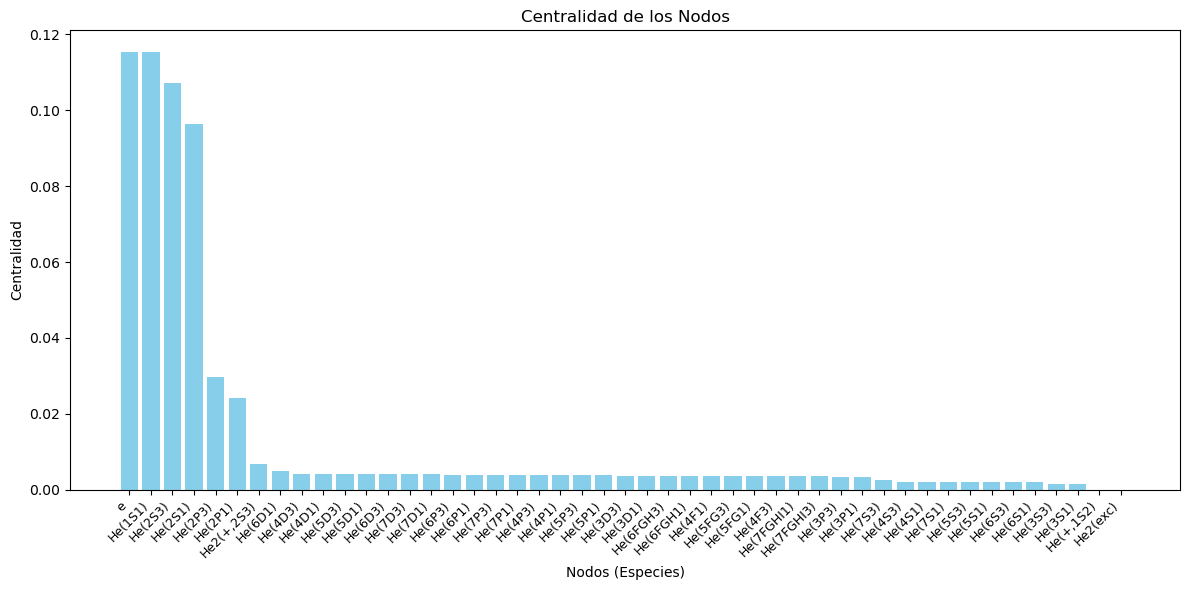

--- Centralidad de los Nodos ---


In [9]:
import networkx as nx  
import matplotlib.pyplot as plt
import numpy as np

# Vamos a llamar a las funciones que leen el archivo y extraen las especies y reacciones
uniqueSpecies, reactions = parseChemFile('helium.chem')

# Creamos el grafo de manera que permite hacer multiples puentes ente nodos
G = nx.MultiDiGraph()

# Definimos los nodos de la red
G.add_nodes_from(uniqueSpecies)

# Añadimos las interacciones entre especies

for reaction in reactions:
    # Extraemos los reactivos y los productos
    lhsSpecies = reaction['lhsSpecies']
    rhsSpecies = reaction['rhsSpecies']
    # Marcamos la interacción en un sentido
    for reactant in lhsSpecies:
        for product in rhsSpecies:
            G.add_edge(reactant, product)
            
    if reaction['backwardReaction']:
        # Marcamos la interacción en el sentido contrario si es reversible
        for product in rhsSpecies:
            for reactant in lhsSpecies:
                G.add_edge(product, reactant)
                

# Vamos a obtener la matriz de adyacencia que representa la red

orden_nodos = list(G.nodes)
matriz_adyacencia = nx.to_numpy_array(G, nodelist=orden_nodos)

print(f"Orden de nodos (filas/columnas): {orden_nodos}\n")
print("--- Matriz de Adyacencia (Formato NumPy) ---")
print(matriz_adyacencia)
print("\n")

# Según el libro a partir de la matriz de adyacencia se puede obtener mucha info, pero lo hago mañana que tengo sueño.

# El grado de cada nodo lo obtenemos sumando las filas y columnas de la matriz de adyacencia:
grado_entrada = []
grado_salida = []
for i in range(len(orden_nodos)):
    grado_entrada.append(np.sum(matriz_adyacencia[:, i]))
    grado_salida.append(np.sum(matriz_adyacencia[i, :]))

# Vamos a representar los resultados en un histograma
plt.figure(figsize=(20, 7))
plt.bar(orden_nodos, grado_entrada, alpha=0.6, label='Grado de Entrada')
plt.bar(orden_nodos, grado_salida, alpha=0.6, label='Grado de Salida', bottom=grado_entrada)
plt.xlabel('Nodos (Especies)')
plt.ylabel('Grado')
plt.title('Grado de Entrada y Salida de Cada Nodo')
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
# plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()

# Empleando este comando ordena los nodos como si fueran cargas unidas por muelles
# pos = nx.spring_layout(G)

# Vamos a hacer que imprima los nodos en la pantalla respetando las distancias a las que se encuentran en la red
pos = nx.kamada_kawai_layout(G)
# Vamos a imponer que el tamaño de los nodos sea proporcional al grado total (entrada + salida)
grado_total = [grado_entrada[i] + grado_salida[i] for i in range(len(orden_nodos))]
node_sizes = [3 + 1 * grado for grado in grado_total]
# Dibuja los nodos, etiquetas y aristas
nx.draw(G, pos,node_size = node_sizes, with_labels=True, node_color='lightgrey', font_size=5)

# Opcional: Dibuja las etiquetas de las aristas (para ver la descripción)
edge_labels = nx.get_edge_attributes(G, 'label')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels) # Puede ensuciar el gráfico

plt.title("Red de Reacciones Químicas")
plt.show()





# Vamos a determinar la centralidad de los nodos.
centrality = nx.betweenness_centrality(G)
# Ordenamos los nodos por su centralidad
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("--- Centralidad de los Nodos ---")
for node, cent in sorted_centrality:
    print(f"Nodo: {node}, Centralidad: {cent:.4f}")

# Vamos a hacer tambien una grafica en la que podamos ver la centralidad de los nodos
plt.figure(figsize=(12, 6))
nodes = [node for node, cent in sorted_centrality]
centrality_values = [cent for node, cent in sorted_centrality]
plt.bar(nodes, centrality_values, color='skyblue')
plt.xlabel('Nodos (Especies)')
plt.ylabel('Centralidad')
plt.title('Centralidad de los Nodos')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()
print("--- Centralidad de los Nodos ---")



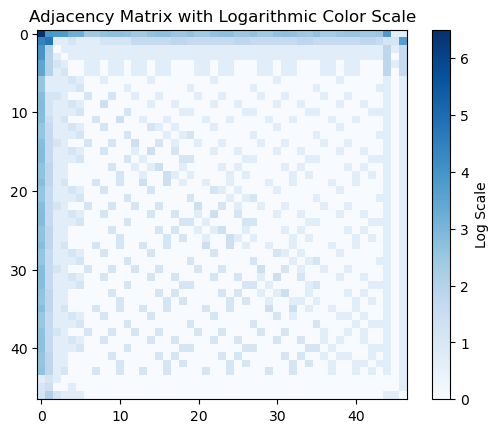

In [14]:
plt.imshow(np.log1p(matriz_adyacencia), cmap='Blues', interpolation='nearest')
plt.colorbar(label='Log Scale')
plt.title('Adjacency Matrix with Logarithmic Color Scale')
plt.show()

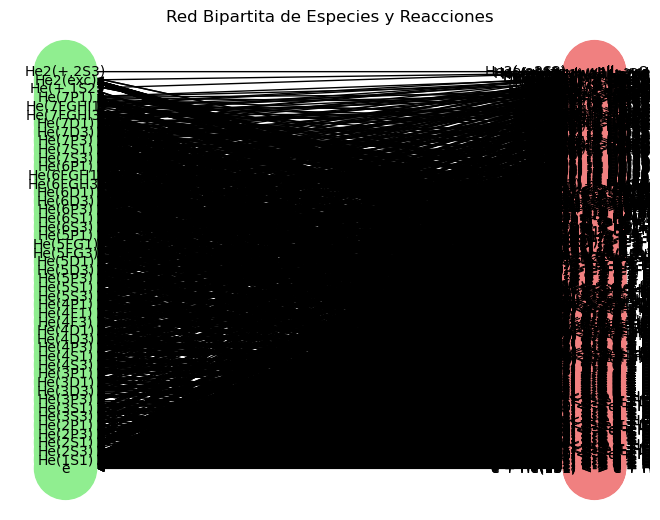

El orden de los nodos en la matriz de adyacencia bipartita es: ['e', 'He(1S1)', 'He(2S3)', 'He(2S1)', 'He(2P3)', 'He(2P1)', 'He(3S3)', 'He(3S1)', 'He(3P3)', 'He(3D3)', 'He(3D1)', 'He(3P1)', 'He(4S3)', 'He(4S1)', 'He(4P3)', 'He(4D3)', 'He(4D1)', 'He(4F3)', 'He(4F1)', 'He(4P1)', 'He(5S3)', 'He(5S1)', 'He(5P3)', 'He(5D3)', 'He(5D1)', 'He(5FG3)', 'He(5FG1)', 'He(5P1)', 'He(6S3)', 'He(6S1)', 'He(6P3)', 'He(6D3)', 'He(6D1)', 'He(6FGH3)', 'He(6FGH1)', 'He(6P1)', 'He(7S3)', 'He(7S1)', 'He(7P3)', 'He(7D3)', 'He(7D1)', 'He(7FGHI3)', 'He(7FGHI1)', 'He(7P1)', 'He(+,1S2)', 'He2(exc)', 'He2(+,2S3)', 'e + He(1S1) <-> e + He(2S3)', 'e + He(1S1) <-> e + He(2S1)', 'e + He(1S1) <-> e + He(2P3)', 'e + He(1S1) <-> e + He(2P1)', 'e + He(1S1) <-> e + He(3S3)', 'e + He(1S1) <-> e + He(3S1)', 'e + He(1S1) <-> e + He(3P3)', 'e + He(1S1) <-> e + He(3D3)', 'e + He(1S1) <-> e + He(3D1)', 'e + He(1S1) <-> e + He(3P1)', 'e + He(1S1) <-> e + He(4S3)', 'e + He(1S1) <-> e + He(4S1)', 'e + He(1S1) <-> e + He(4P3)', 'e +

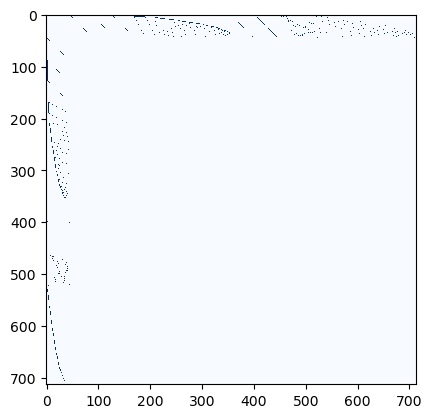

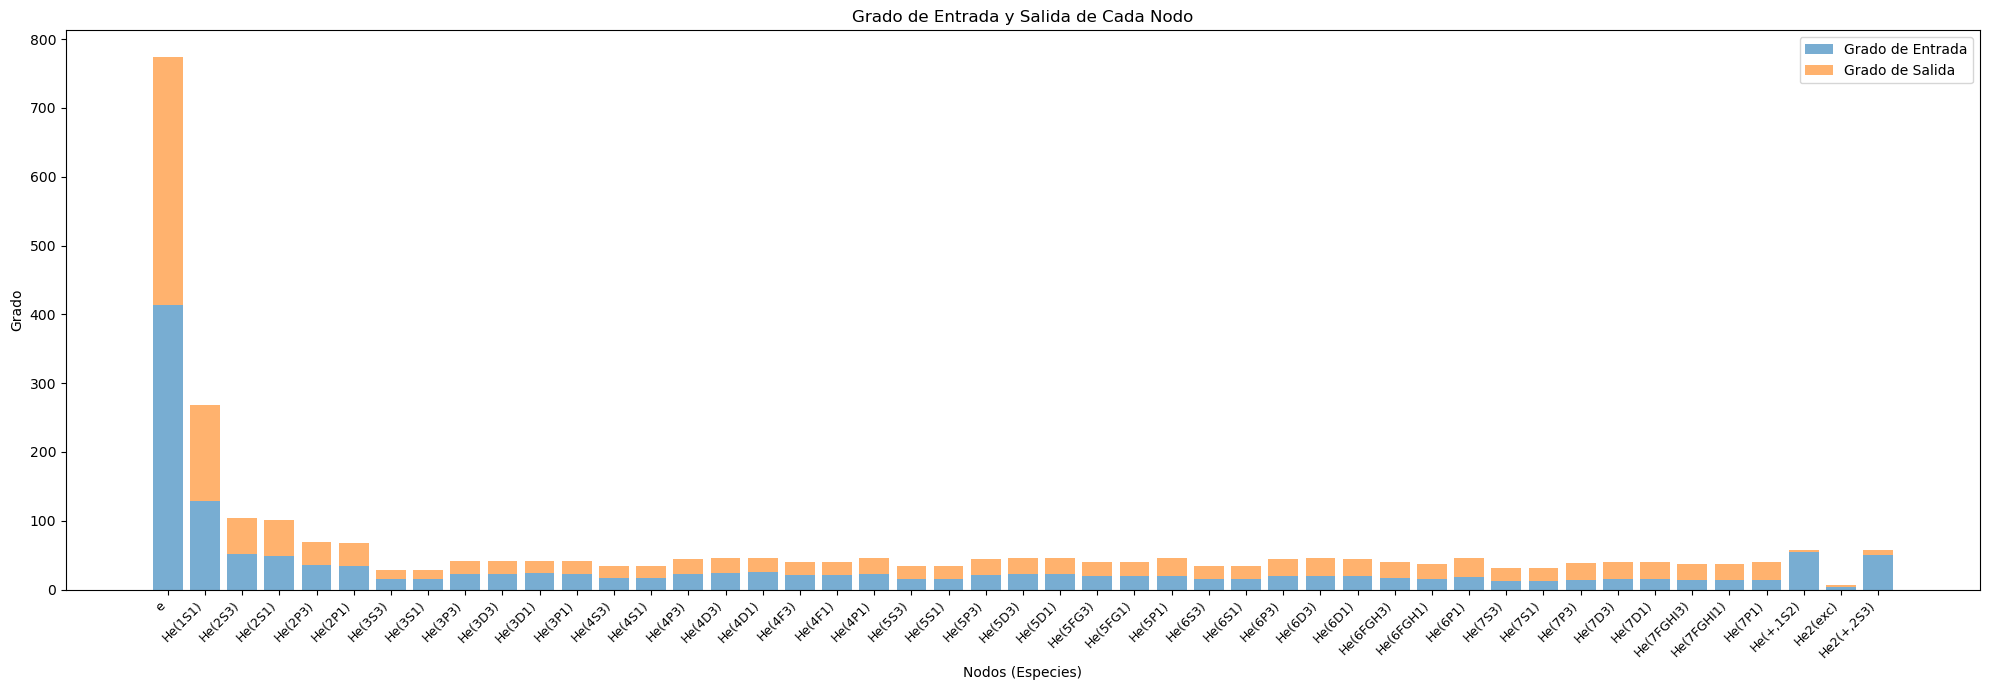

In [5]:
import networkx as nx
# Vamos a hacer una red bipartita, unos nodos serán las especies y 
# los otros nodos representan las reacciones en las que participan.

#Inicializamos un grafo dirigido, nos importa el flujo la direccion de la reacciones.
B = nx.DiGraph()

# Aádimos los nodos a la red
B.add_nodes_from(uniqueSpecies, bipartite=0) 
for r in reactions:
        B.add_nodes_from([r['description']], bipartite = 1)

# Definimos las interacciones entre las especies y las reacciones.

for reaction in reactions:
    lhsSpecies = reaction['lhsSpecies']
    rhsSpecies = reaction['rhsSpecies']
    reactionDesc = reaction['description']
    lhsSpeciesCoeffs = reaction['lhsStoichiometricCoeffs']
    rhsSpeciesCoeffs = reaction['rhsStoichiometricCoeffs']
    # Conectamos los reactivos a la reacción
    for reactant in lhsSpecies:
        # Añadimos tantas aristas como el valor del coeficiente estequiométrico
        for _ in range(lhsSpeciesCoeffs[lhsSpecies.index(reactant)]):
            B.add_edge(reactant, reactionDesc)
    # Conectamos la reacción a los productos
    for product in rhsSpecies:
        # Añadimos tantas aristas como el valor del coeficiente estequiométrico
        for _ in range(rhsSpeciesCoeffs[rhsSpecies.index(product)]):
            B.add_edge(reactionDesc, product)
    if reaction['backwardReaction']:
        # Si la reacción es reversible, conectamos en el sentido contrario
        for product in rhsSpecies:
            B.add_edge(product, reactionDesc)
        for reactant in lhsSpecies:
            B.add_edge(reactionDesc, reactant)

# Una vez hemos definido todas las interacciones, vamos a graficar la red bipartita

pos = nx.bipartite_layout(B, uniqueSpecies)
nx.draw(B, pos, with_labels=True, node_color=['lightgreen' if n in uniqueSpecies else 'lightcoral' for n in B.nodes()], node_size=2000, font_size=10)
plt.title("Red Bipartita de Especies y Reacciones")
plt.show()

#A diferencia de la red anterior, en esta no perdemos información en caso de que las especies se 
# involucren en múltiples reacciones, también hemos tenido en cuenta los coeficientes etequiométricos
# a la hora de representar los enlaces.

# Vamos a imprimir la matriz de adyacencia.
M_bipartita = nx.to_numpy_array(B, nodelist=list(B.nodes))
plt.imshow(M_bipartita, cmap='Blues', interpolation='nearest')
print(f"El orden de los nodos en la matriz de adyacencia bipartita es: {list(B.nodes)}\n")

# Calculamos los grados de las especies empleando la matriz de adyacencia
grado_entrada_especies_bi = []
grado_salida_especies_bi = []
bipartite_0_nodes = [n for n in B.nodes if B.nodes[n].get('bipartite') == 0]
for i in range(len(bipartite_0_nodes)):
    grado_entrada_especies_bi.append(np.sum(M_bipartita[:, i]))
    grado_salida_especies_bi.append(np.sum(M_bipartita[i, :]))

print(f"El orden de los nodos asociados a las especies en la matriz de adyacencia bipartita es: {bipartite_0_nodes}\n")
# Vamos a representar los resultados en un histograma
plt.figure(figsize=(20, 7))
plt.bar(bipartite_0_nodes, grado_entrada_especies_bi, alpha=0.6, label='Grado de Entrada')
plt.bar(bipartite_0_nodes, grado_salida_especies_bi, alpha=0.6, label='Grado de Salida', bottom=grado_entrada_especies_bi)
plt.xlabel('Nodos (Especies)')
plt.ylabel('Grado')
plt.title('Grado de Entrada y Salida de Cada Nodo')
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

# Me parece que en una red bipartita no tiene sentido calcular la centralidad de los nodos.


El orden de los nodos en la matriz de adyacencia bipartita es: ['e + He(1S1) <-> e + He(2S3)', 'e_in', 'He(1S1)_in', 'e_out', 'He(2S3)_out', 'He(2S3)_in', 'He(1S1)_out', 'e + He(1S1) <-> e + He(2S1)', 'He(2S1)_out', 'He(2S1)_in', 'e + He(1S1) <-> e + He(2P3)', 'He(2P3)_out', 'He(2P3)_in', 'e + He(1S1) <-> e + He(2P1)', 'He(2P1)_out', 'He(2P1)_in', 'e + He(1S1) <-> e + He(3S3)', 'He(3S3)_out', 'He(3S3)_in', 'e + He(1S1) <-> e + He(3S1)', 'He(3S1)_out', 'He(3S1)_in', 'e + He(1S1) <-> e + He(3P3)', 'He(3P3)_out', 'He(3P3)_in', 'e + He(1S1) <-> e + He(3D3)', 'He(3D3)_out', 'He(3D3)_in', 'e + He(1S1) <-> e + He(3D1)', 'He(3D1)_out', 'He(3D1)_in', 'e + He(1S1) <-> e + He(3P1)', 'He(3P1)_out', 'He(3P1)_in', 'e + He(1S1) <-> e + He(4S3)', 'He(4S3)_out', 'He(4S3)_in', 'e + He(1S1) <-> e + He(4S1)', 'He(4S1)_out', 'He(4S1)_in', 'e + He(1S1) <-> e + He(4P3)', 'He(4P3)_out', 'He(4P3)_in', 'e + He(1S1) <-> e + He(4D3)', 'He(4D3)_out', 'He(4D3)_in', 'e + He(1S1) <-> e + He(4D1)', 'He(4D1)_out', 'He(

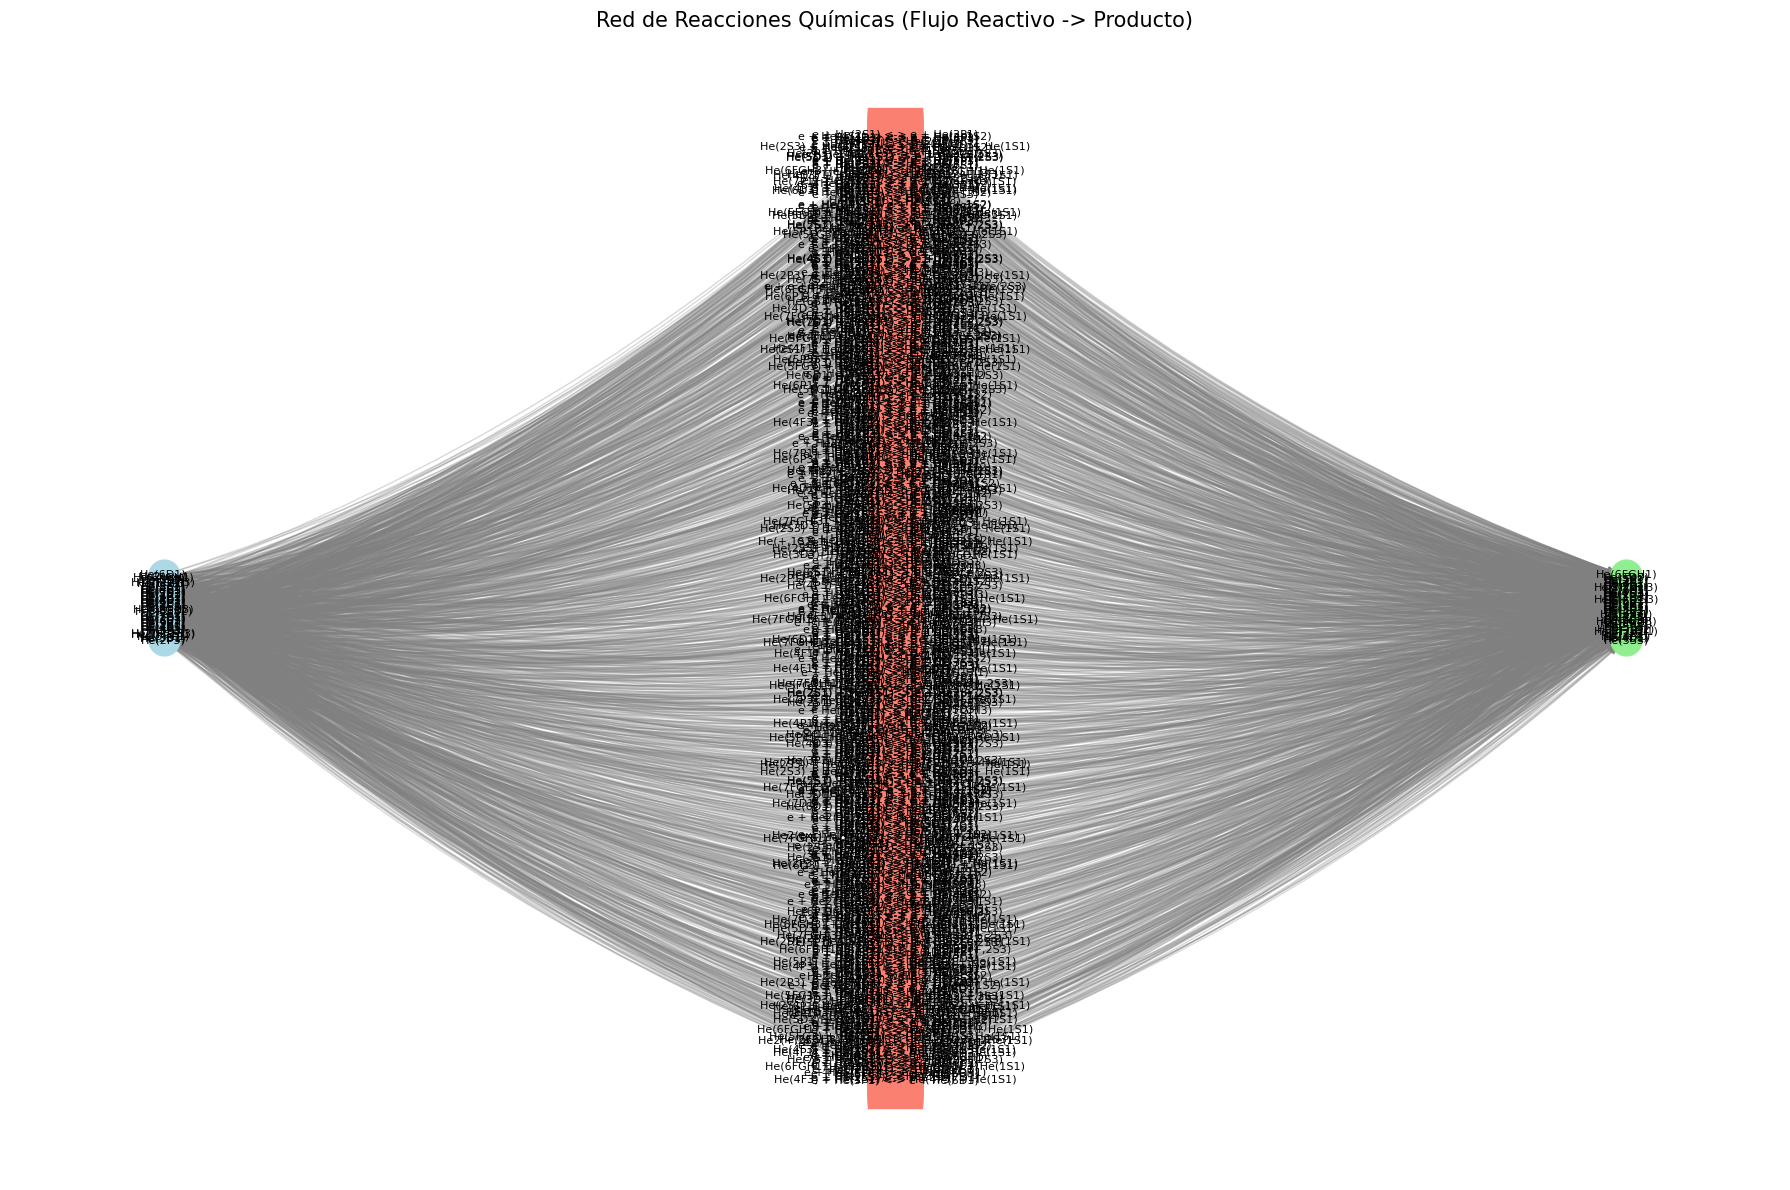

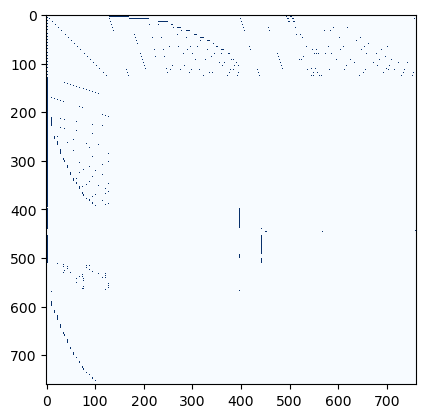

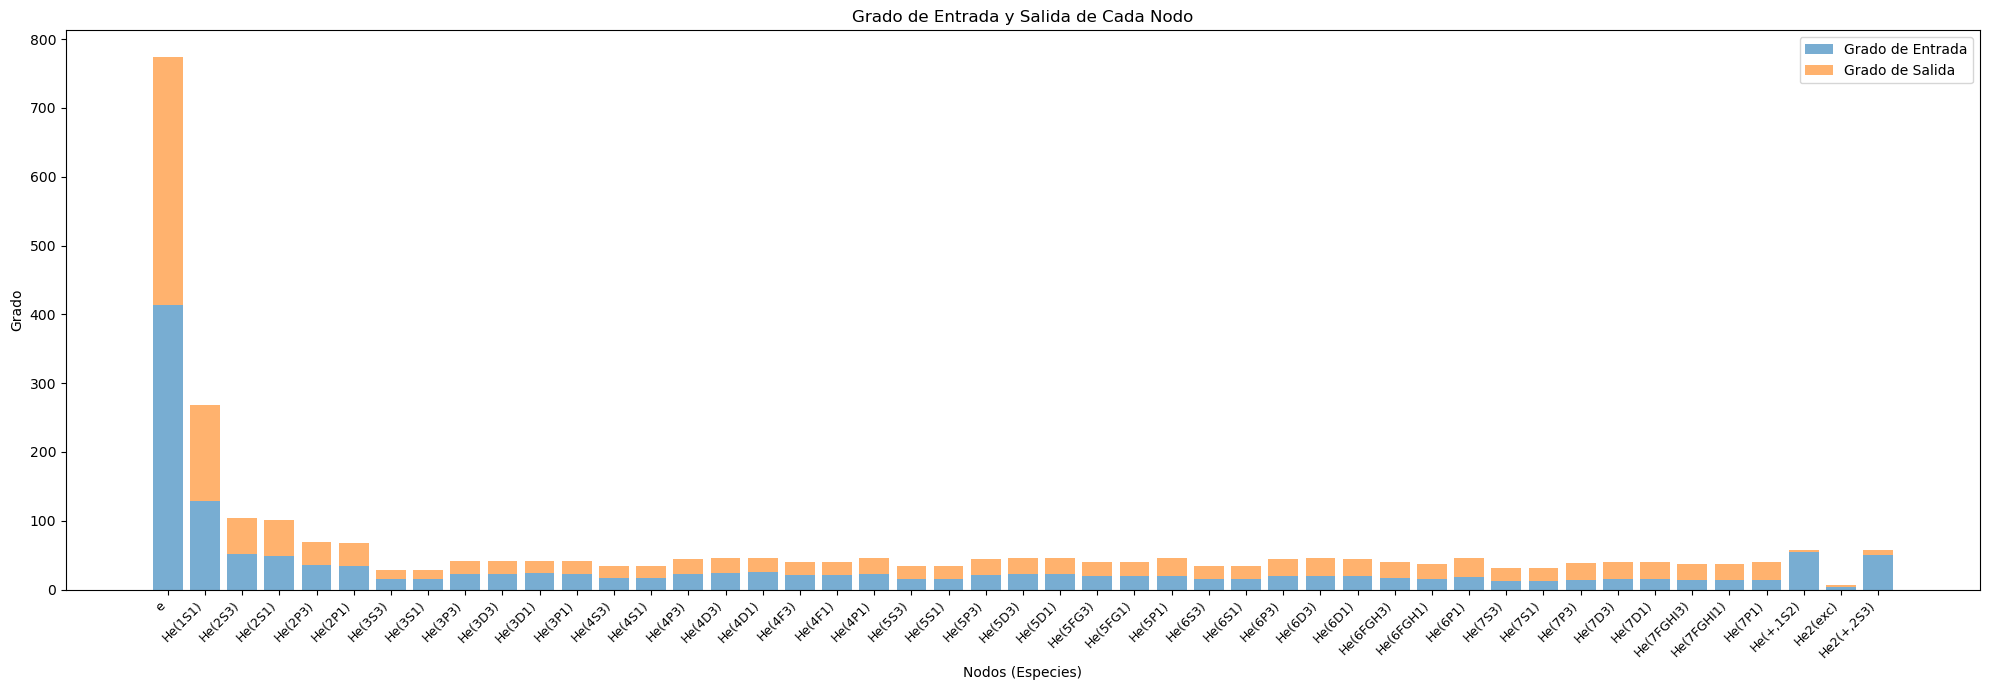

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos en 'reactions' y 'uniqueSpecies'
# (He simulado una estructura pequeña para que el código sea funcional si lo copias)
# Asegúrate de tener tus datos cargados antes de ejecutar esto.

H = nx.DiGraph()

# --- PASO 1: DEFINICIÓN DE NODOS CON SUFIJOS ---
# Truco: Agregamos '_in' o '_out' al nombre para diferenciar visualmente
# la misma sustancia en el lado izquierdo y derecho.

# No estoy teniendo en cuenta si la reaccion es reversible, por eso la discrepancia en los grados!!!!!
for r in reactions: # Usamos 'r'
    reaction_id = r['description']
    
    # Extraemos las listas para usarlas cómodamente
    lhs_species_list = r['lhsSpecies']
    rhs_species_list = r['rhsSpecies']
    lhs_coeffs = r['lhsStoichiometricCoeffs']
    rhs_coeffs = r['rhsStoichiometricCoeffs']

    # Capa Central: Reacciones (Layer 1)
    H.add_node(reaction_id, layer=1, label=reaction_id, type="reaction")

    # --- Conectar Reactivos -> Reacción ---
    for reactant in lhs_species_list:
        r_node = f"{reactant}_in"
        H.add_node(r_node, layer=0, label=reactant, type="reactant")
        
        # Buscamos el índice usando 'reactant' (NO product) en la lista correcta
        idx = lhs_species_list.index(reactant)
        coeficiente = lhs_coeffs[idx]
        
        # Añadimos tantas aristas como diga el coeficiente
        for _ in range(coeficiente):
            H.add_edge(r_node, reaction_id)

    # --- Conectar Reacción -> Productos ---
    for product in rhs_species_list:
        p_node = f"{product}_out"
        H.add_node(p_node, layer=2, label=product, type="product")
        
        # Buscamos el índice usando 'product' en la lista correcta
        idx = rhs_species_list.index(product)
        coeficiente = rhs_coeffs[idx]
        
        # Añadimos tantas aristas como diga el coeficiente
        for _ in range(coeficiente):
            H.add_edge(reaction_id, p_node)
    # Vemos si la reaccion es reversible
    if r['backwardReaction']:
        # --- Conectar Productos -> Reacción ---
        for product in rhs_species_list:
            p_node = f"{product}_in"
            H.add_node(p_node, layer=0, label=product, type="reactant")
            
            # Buscamos el índice usando 'product' en la lista correcta
            idx = rhs_species_list.index(product)
            coeficiente = rhs_coeffs[idx]
            
            # Añadimos tantas aristas como diga el coeficiente
            for _ in range(coeficiente):
                H.add_edge(p_node, reaction_id)

        # --- Conectar Reacción -> Reactivos ---
        for reactant in lhs_species_list:
            r_node = f"{reactant}_out"
            H.add_node(r_node, layer=2, label=reactant, type="product")
            
            # Buscamos el índice usando 'reactant' en la lista correcta
            idx = lhs_species_list.index(reactant)
            coeficiente = lhs_coeffs[idx]
            
            # Añadimos tantas aristas como diga el coeficiente
            for _ in range(coeficiente):
                H.add_edge(reaction_id, r_node)

print(f"El orden de los nodos en la matriz de adyacencia bipartita es: {list(H.nodes)}\n")

# Graficamos la red
plt.figure(figsize=(18, 12)) 
pos = nx.multipartite_layout(H, subset_key="layer")
# Separamos los nodos por capas
reactivos_nodes = [n for n, d in H.nodes(data=True) if d['layer'] == 0]
reacciones_nodes = [n for n, d in H.nodes(data=True) if d['layer'] == 1]
productos_nodes = [n for n, d in H.nodes(data=True) if d['layer'] == 2]

nx.draw_networkx_nodes(H, pos, nodelist=reactivos_nodes, node_color='lightblue', node_size=500, alpha=0.8)
nx.draw_networkx_nodes(H, pos, nodelist=reacciones_nodes, node_color='salmon', node_size=1500, node_shape="s") # Cuadrados para reacciones
nx.draw_networkx_nodes(H, pos, nodelist=productos_nodes, node_color='lightgreen', node_size=500, alpha=0.8)

nx.draw_networkx_edges(H, pos, alpha=0.3, edge_color='gray', arrows=True, arrowsize=10, connectionstyle="arc3,rad=0.1")

labels = nx.get_node_attributes(H, 'label')

# Usamos un tamaño de fuente pequeño para que quepan
nx.draw_networkx_labels(H, pos, labels, font_size=8, font_family="sans-serif")

# Ajustes finales
plt.title("Red de Reacciones Químicas (Flujo Reactivo -> Producto)", fontsize=15)
plt.axis('off') # Quitar ejes
plt.tight_layout()
plt.show()

# A continuación, vamos a calcular los grados de entrada y salida de cada nodo, para ello usamo la matriz de adyacencia

#orden_nodos_H = reactivos_nodes + reacciones_nodes + productos_nodes
matriz_adyacencia_H = nx.to_numpy_array(H)
plt.imshow(matriz_adyacencia_H, cmap='Blues', interpolation='nearest')

#print(f"El orden de los nodos de entrada es: {reactivos_nodes}\n")
#print(f"El orden de los nodos de las reacciones es: {reacciones_nodes}\n")
#print(f"El orden de los nodos de salida es: {productos_nodes}\n")
#print(f"El orden de los nodos en la matriz de adyacencia bipartita es: {orden_nodos_H}\n")

# Con los nodos ordenados, podemos calcular los grados de entrada y salida.
#grado_entrada_H = []
#grado_salida_H = []
#for i in range(len(H.nodes)):
    #grado_entrada_H.append(np.sum(matriz_adyacencia_H[:, i]))
    #grado_salida_H.append(np.sum(matriz_adyacencia_H[i, :]))
# Vamos a buscar las posiciones de las especies (tanto entrada como salida)

grado_esp_entrada = []
grado_esp_salida = []
# Recorremos las especies únicas y calculamos su grado de entrada y salida

for species in uniqueSpecies:
    species_in = f"{species}_in"
    species_out = f"{species}_out"
    idx_in = list(H.nodes).index(species_in)
    idx_out = list(H.nodes).index(species_out)
    grado_esp_entrada.append(np.sum(matriz_adyacencia_H[:, idx_out]))
    grado_esp_salida.append(np.sum(matriz_adyacencia_H[idx_in, :]))

# Finalmente, representamos los resultados en un histograma
plt.figure(figsize=(20, 7))
plt.bar(uniqueSpecies, grado_esp_entrada, alpha=0.6, label='Grado de Entrada')
plt.bar(uniqueSpecies, grado_esp_salida, alpha=0.6, label='Grado de Salida', bottom=grado_esp_entrada)
plt.xlabel('Nodos (Especies)')
plt.ylabel('Grado')
plt.title('Grado de Entrada y Salida de Cada Nodo')
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()        


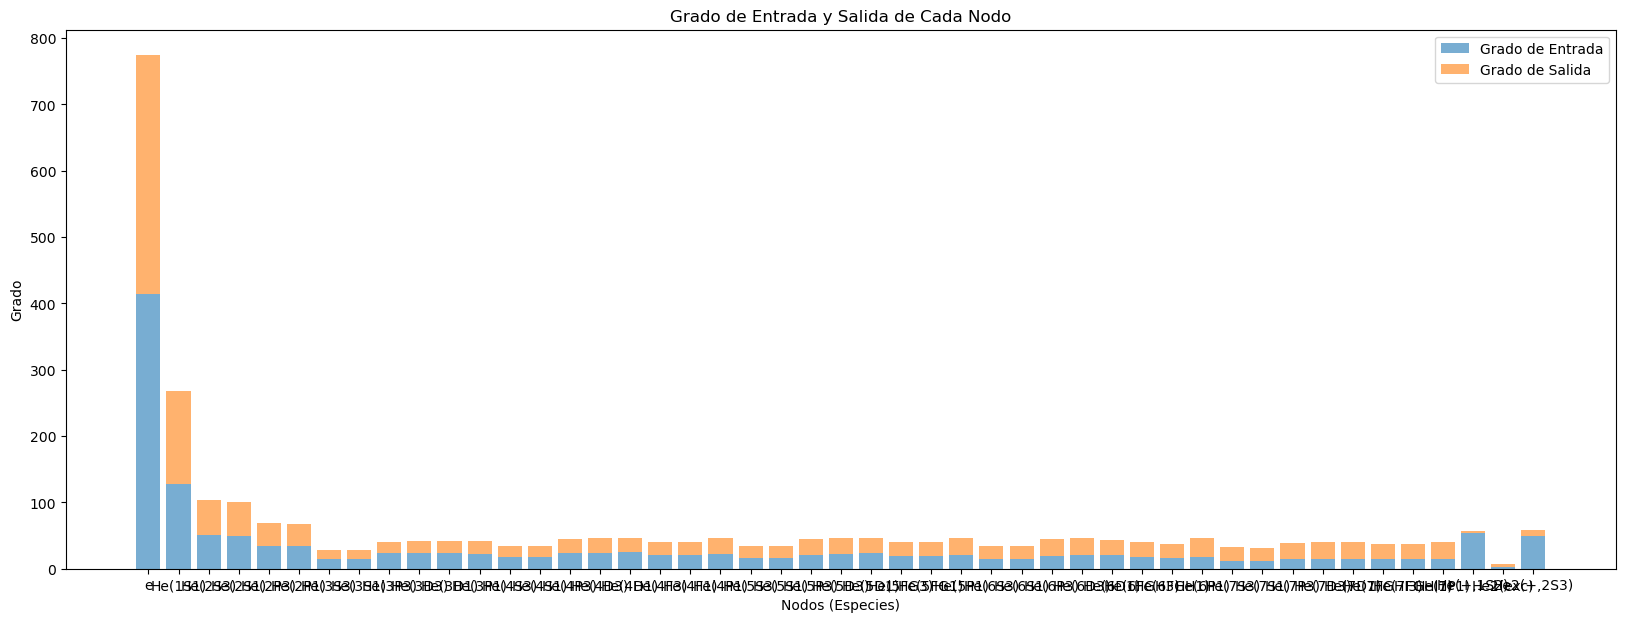

In [7]:
# Vamos a comprobar los grados de entrada y salida de cada especie con funciones propias de NetworkX
grado_esp_entrada = []  # Reiniciamos las listas para evitar duplicados
grado_esp_salida = []

for species in uniqueSpecies:
    species_in = f"{species}_in"
    species_out = f"{species}_out"
    
    # Si el nodo existe en H, pide su grado. Si no, devuelve 0.
    # out_degree de species_in = Cuántas reacciones lo consumen
    consumo = H.out_degree(species_in) if species_in in H else 0
    
    # in_degree de species_out = Cuántas reacciones lo producen
    produccion = H.in_degree(species_out) if species_out in H else 0
    
    grado_esp_salida.append(consumo)
    grado_esp_entrada.append(produccion)
    
# Vamos a graficar los grados de entrada y salida de cada especie
plt.figure(figsize=(20, 7))
plt.bar(uniqueSpecies, grado_esp_entrada, alpha=0.6, label='Grado de Entrada')
plt.bar(uniqueSpecies, grado_esp_salida, alpha=0.6, label='Grado de Salida', bottom=grado_esp_entrada)
plt.xlabel('Nodos (Especies)')
plt.ylabel('Grado')
plt.title('Grado de Entrada y Salida de Cada Nodo')
plt.legend()

In [ ]:
    # pariplot biblioteca seaborn tener en cuenta que se pueden pesar los puentes, transparencia y colores en los puentes, representar
    # correctamente la matriz de adyacencia de la red tripatita
